# Лабораторная работа 2

## Линейная регрессия

## Часть 1: Приближаем функции


### Метод наименьших квадратов: постановка задачи

Рассмотрим систему уравнений $Xa = y$, в которой $a$ — столбец неизвестных. Её можно переписать в векторном виде
$$x_1 a_1 + x_2 a_2 + \ldots + x_k a_k = y,$$
где $x_1,\ldots,x_k$ — столбцы матрицы $X$. Таким образом, решить исходную систему означает найти линейную комбинацию векторов $x_1,\ldots,x_k$, равную правой части. Но что делать, если такой линейной комбинации не существует? Геометрически это означает, что вектор $y$ не лежит в подпространстве $U = \langle x_1,\ldots, x_k\rangle$. В этом случае мы можем найти *псевдорешение*: вектор коэффициентов $\hat{a}$, для которого линейная комбинация $x_1 \hat{a}_1 + x_2 \hat{a}_2 + \ldots + x_k \hat{a}_k$ хоть и не равна в точности $y$, но является наилучшим приближением — то есть ближайшей к $y$ точкой $\hat{y}$ подпространства $U$ (иными словами, ортогональной проекцией $y$ на это подпростанство). Итак, цель наших исканий можно сформулировать двумя эквивалентными способами:

1. Найти вектор $\hat{a}$, для которого длина разности $|X\hat{a} - y|$ минимальна;
2. Найти ортогональную проекцию $\hat{y}$ вектора $y$ на подпространство $U$ и представить её в виде $X\hat{a}$.

Далее мы будем предполагать, что векторы $x_1,\ldots,x_k$ линейно независимы (если нет, то сначала имеет смысл выделить максимальную линейно независимую подсистему).

На лекциях было показано, что проекция вектора $y$ на подпространство $U = \langle x_1,\ldots, x_k\rangle$, записывается в виде
$$\hat{y} = X\left(X^TX\right)^{-1}X^Ty,$$
и, соответственно, искомый вектор $\hat{a}$ равен
$$\hat{a} = \left(X^TX\right)^{-1}X^Ty.$$

### Задача линейной регрессии

Начнём с примера. Допустим, вы хотите найти зависимость среднего балла S студента ФКН от его роста H, веса W, длины волос L и N — количества часов, которые он ежедневно посвящает учёбе. Представьте, что мы измерили все эти параметры для $n$ студентов и получили наборы значений: $S_1,\ldots, S_n$, $H_1,\ldots, H_n$ и так далее.

Теперь мы хотим построить **модель**, т.е. определить алгоритм, который будет принимать на вход некоторый набор параметров (в данном случае это измеренные нами $H, W, L$ и $N$), и выдавать значение некоторой **целевой переменной** (в данном примере это $S$). Тут можно подбирать много разных умных моделей, но начать имеет смысл с самой простой, линейной:

$$S = a_0 + a_1H + a_2W + a_3L + a_4N.$$

Конечно, строгой линейной зависимости нет (иначе можно было бы радостно упразднить экзамены), но мы можем попробовать подобрать коэффициенты $a_0, a_1, a_2, a_3, a_4$, удовлетворяющие вот такому требованию:
$$\sum_{i=1}^n\left(S_i - ( a_0 + a_1H_i + a_2W_i + a_3L_i + a_4N_i)\right)^2 \longrightarrow \min$$
Т.е. мы хотим, чтобы квадрат отклонения правой части от левой был поменьше для всех $n$ студентов. Введём несколько обозначений:
$$X =
\begin{pmatrix}
1 & H_1 & W_1 & L_1 & N_1\\
1 & H_2 & W_2 & L_2 & N_2\\
\vdots & \vdots & \vdots & \vdots & \vdots \\
1 & H_n & W_n & L_n & N_n
\end{pmatrix}, \qquad a=
\begin{pmatrix}
a_0\\ a_1\\ \vdots\\ a_4
\end{pmatrix},\qquad y=
\begin{pmatrix}
S_1\\ S_2\\ \vdots \\ S_n
\end{pmatrix}.$$

Теперь наше требование выше можно переписать в таком виде:
$$
\sum_{i=1}^n\left(S_i - ( a_0 + a_1H_i + a_2W_i + a_3L_i + a_4N_i)\right)^2 = |y - Xa|^2 \longrightarrow \min
$$

И теперь видно, что мы получили задачу на метод наименьших квадратов!
Решая эту задачу с помощью уже известных формул, получаем оценки коэффициентов $\hat{a}_i$ ($i = 1\ldots,5$).

Теперь проговорим общую постановку задачи линейной регрессии. У нас есть $k$ переменных $x_1,\ldots,x_k$ ("регрессоров"), через которые мы хотим выразить "объясняемую переменную" $y$:
$$y = a_1x_1 + a_2x_2 + \ldots + a_kx_k$$
Значения всех переменных мы измерили $n$ раз (у $n$ различных объектов,  в $n$ различных моментов времени - это зависит от задачи). Подставим эти данные в предыдущее равенство:
$$\begin{pmatrix}
y_1\\ y_2 \\ \vdots \\ y_n
\end{pmatrix} = 
a_1\begin{pmatrix}
x_{11} \\ x_{21} \\ \vdots \\ x_{n1} \end{pmatrix} + a_2\begin{pmatrix}
x_{12} \\ x_{22} \\ \vdots \\ x_{n2} \end{pmatrix} + \ldots + a_k\begin{pmatrix}
x_{1k} \\ x_{2k} \\ \vdots \\ x_{nk} \end{pmatrix}$$
(здесь $x_{ij}$ - это значение $j$-го признака на $i$-м измерении). Это удобно переписать в матричном виде:
$$\begin{pmatrix}
x_{11} & x_{12} & \ldots & x_{1k}\\
x_{21} & x_{22} & \ldots & x_{2k}\\
\dots & \dots & \dots & \dots\\
x_{n1} & x_{n2} & \ldots & x_{nk}
\end{pmatrix} \cdot
\begin{pmatrix}
a_1 \\ a_2 \\ \vdots \\ a_k
\end{pmatrix} = 
\begin{pmatrix}
y_1 \\ y_2 \\ \vdots \\ y_n
\end{pmatrix}$$
или коротко $Xa = y$. Поскольку на практике эта система уравнений зачастую не имеет решения (ибо зависимости в жизни редко бывают действительно линейными), методом наименьших квадратов ищется псевдорешение.

### Оценка качества. Обучение и тест 

После того, как вы построили регрессию и получили какую-то зависимость объясняемой переменной от регрессоров, настаёт время оценить качество регрессии. Есть много разных функционалов качества; мы пока будем говорить только о самом простом и очевидном из них: о среднеквадратичной ошибке (mean square error). Она равна
$$\frac1{n}|X\hat{a} - y|^2 = \frac1{n}\sum_{i=1}^n\left(\hat{a}_1x_{i1} + \hat{a}_2x_{i2} + \ldots + \hat{a}_kx_{ik} - y_i\right)^2$$

В целом, хочется искать модели с наименьшей mean square error на имеющихся данных. Однако слишком фанатичная гонка за минимизацией ошибки может привести к печальным последствиям, в чём Вам предстоит убедиться в ходе выполнения этой лабораторной.

Чтобы не попадать в эту ловушку, данные обычно делят на обучающие (по которым строят модель и оценивают коэффициенты) и тестовые. Лучшей стоит счесть ту модель, для которой значение функционала качества будет меньше.

### Правила оформления графиков
При работе с данными часто неудобно делать какие-то выводы, если смотреть на таблицу и числа в частности, поэтому важно уметь визуализировать данные. 

У matplotlib, конечно же, есть [документация](https://matplotlib.org/users/index.html) с большим количеством [примеров](https://matplotlib.org/examples/), но для начала достаточно знать про несколько основных типов графиков:
- plot — обычный поточечный график, которым можно изображать кривые или отдельные точки;
- hist — гистограмма, показывающая распределение некоторой величины;
- scatter — график, показывающий взаимосвязь двух величин;
- bar — столбцовый график, показывающий взаимосвязь количественной величины от категориальной.

Ещё одна билиотека для визуализации: [seaborn](https://jakevdp.github.io/PythonDataScienceHandbook/04.14-visualization-with-seaborn.html). Это надстройка над matplotlib, иногда удобнее и красивее делать визуализации через неё. 

При выполнении этой лабораторной Вы столкнётесь с необходимостью рисовать большое количество графиков. Не забывайте про базовые принципы построения приличных графиков:
- оси должны быть подписаны, причём не слишком мелко;
- у графика должно быть название;
- если изображено несколько графиков, то необходима поясняющая легенда;
- для точек из разных выборок необходимо использовать разные цвета;
- все линии на графиках должны быть чётко видны (нет похожих цветов или цветов, сливающихся с фоном);
- если отображена величина, имеющая очевидный диапазон значений (например, проценты могут быть от 0 до 100), то желательно масштабировать ось на весь диапазон значений (исключением является случай, когда вам необходимо показать малое отличие, которое незаметно в таких масштабах).

Помните, что проверяющий имеет право снизить оценку за неопрятные графики.

### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате homework-practice-02-linregr-Username.ipynb, где Username — Ваша фамилия.

### Задание 1. Метод наименьших квадратов (3.1 баллов)

**ВАЖНО! В этом задании вам нельзя использовать циклы (в том числе рекурсии, генераторы и конструкции вида map/reduce), кроме цикла в задании 1.5, который мы вам оставили. За наличие цикла в вашем коде мы поставим вам не более половины от стоимости задания.**

Скачайте файлы ``train.txt`` и ``test.txt``. Каждый из файлов содержит два столбца чисел, разделённых пробелами: в первом — некоторое число точек (значения аргумента $x$), во втором — значения некоторой функции $y = f(x)$ в этих точках, искажённые случайным шумом. Функцию $f$ мы вам не скажем. Ваша задача — по данным из файла ``train.txt`` (будем называть их обучающей выборкой) подобрать функцию $y = g(x)$, пристойно приближающую неизвестную вам зависимость.

Загрузим обучающие и тестовые данные (из файла ``test.txt``).

In [1]:
import numpy as np
import scipy.linalg as sla

import matplotlib.pyplot as plt
%matplotlib inline
from os.path import join

PATH = "/Users/mip182/Downloads/Лабораторная-2" ### Вставить заглушку (не забудьте ввести правильный путь!)

data_train = np.loadtxt(join(PATH, "train.txt"), delimiter=',')
data_test = np.loadtxt(join(PATH, "test.txt"), delimiter=',')

**0. [0 баллов]** Разделим значения $x$ и $y$

In [2]:
X_train = data_train[:,0]
y_train = data_train[:,1]

# Сделайте то же для тестовой выборки
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
X_test = data_test[:,0]
y_test = data_test[:,1]

**1. [0,15 балла]** Найдите с помощью метода наименьших квадратов линейную функцию $y = kx + b$, наилучшим образом приближающую неизвестную зависимость. Полезные функции: ``numpy.ones(n)`` для создания массива из единиц длины $n$ и ``numpy.concatenate((А, В), axis=1)`` для слияния двух матриц по столбцам (пара ``А`` и ``В`` превращается в матрицу ``[A B]``). Напечатайте этот многочлен в виде $kx+b$.

In [3]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
n = len(X_train)
X = np.concatenate((np.ones(n).reshape((n,1)), X_train.reshape((n,1))), axis=1)
# a = (X^T X) ^{-1} X^T y
a = np.dot(np.dot(sla.inv(np.dot(X.T, X)),X.T), y_train.reshape((n,1)))
print(a[1][0], "x + ", a[0][0])

4.048356078106742 x +  2.4539322330626545


**2. [0,15 балла]** Нарисуйте на плоскости точки $(x_i, y_i)$ из обеих выборок и полученную линейную функцию.

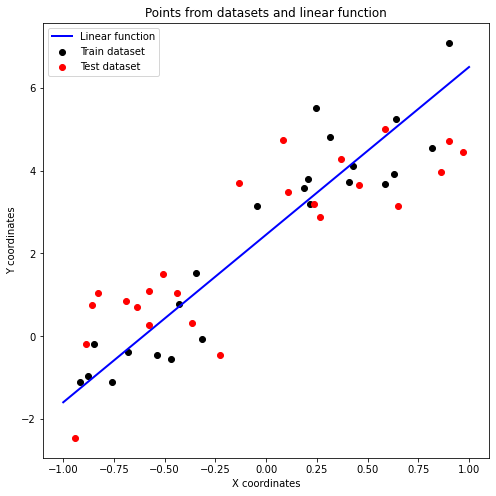

In [4]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
x = np.linspace(-1,1, 100)
plt.figure(figsize=(8, 8))
plt.scatter(X_train, y_train, color='black', label='Train dataset');
plt.scatter(X_test, y_test, color='red', label='Test dataset');
linewidth = 2
plt.plot(x, a[1][0] * x + a[0][0], color='blue', label='Linear function', linewidth = linewidth);
plt.ylabel('Y coordinates')
plt.xlabel('X coordinates')
plt.title('Points from datasets and linear function')
plt.legend()
plt.show()

**3. [0,4 балла]** Глядя на данные, подумайте, многочленом какой степени можно было бы лучше всего приблизить эту функцию с точки зрения минимизации среднеквадратичной ошибки на обучающей выборке. Найдите этот многочлен и сохраните его коэффициенты в массив `poly_coef` (от младшего члена к старшему). Обязательно обоснуйте выбор степени многочлена.

In [5]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
#Так как всего точек n, то существует многочлен степени n-1 который проходит через все точки обучающей выборки.
#Очевидно, что ошибка для него будет 0 (для точек обучающей выборки).
degree = n - 1
X = np.vander(X_train, degree + 1, increasing=True)

# a = (X^T X) ^{-1} X^T y
a = np.dot(np.dot(sla.inv(np.dot(X.T, X)),X.T), y_train.reshape((-1,1)))
poly_coef = a.reshape((1, degree + 1))[0]
# на всякий случай выведу массив коэффициентов в порядке возрастания степени
print(poly_coef)
# выведем еще значения на точках обучающей выборки
print(np.polyval(np.flip(poly_coef), X_train))
print(y_train)


[ 6.85204451e+00  4.64931275e+01 -8.34885101e+02 -3.13688477e-02
  2.30831398e+04 -1.13090687e+04 -2.71937410e+05  1.02194116e+05
  1.67996319e+06 -2.67963191e+05 -5.73051786e+06 -2.53449443e+05
  1.01263690e+07  2.01436201e+06 -5.45088697e+06 -1.09917736e+06
 -1.00105306e+07 -6.07487478e+06  1.76031853e+07  1.04011841e+07
 -8.73351473e+06 -4.90359108e+06  6.76158657e+05]
[ 3.67956811  5.00496008  4.86993307 -0.47998135  3.13804167  7.09940792
  5.25208516 -0.09344397  4.01068918  3.73482886 -1.32740348  1.563286
  4.23330562 -0.5132296   0.72790886  3.31842007 -0.46661325 -3.0313249
  4.6695451   3.54031356  3.94422712 -1.46818119 -2.43950228]
[ 3.676082    4.80174547  5.50741178 -0.36842735  3.13410777  7.08954768
  5.2372674  -0.06191624  3.18829046  3.80822638 -0.19845236  1.51594073
  4.10953943 -0.53860368  0.76869715  3.57683624 -0.45344631 -1.11291634
  4.54736063  3.71986956  3.90974938 -1.09262102 -0.94815863]


**4. [0,15 балла]** Нарисуйте его график на одном чертеже вместе с точками $(x_i, y_i)$ из обеих выборок. Удалось ли графику пройти через все точки из выборки? Попробуйте объяснить, почему?

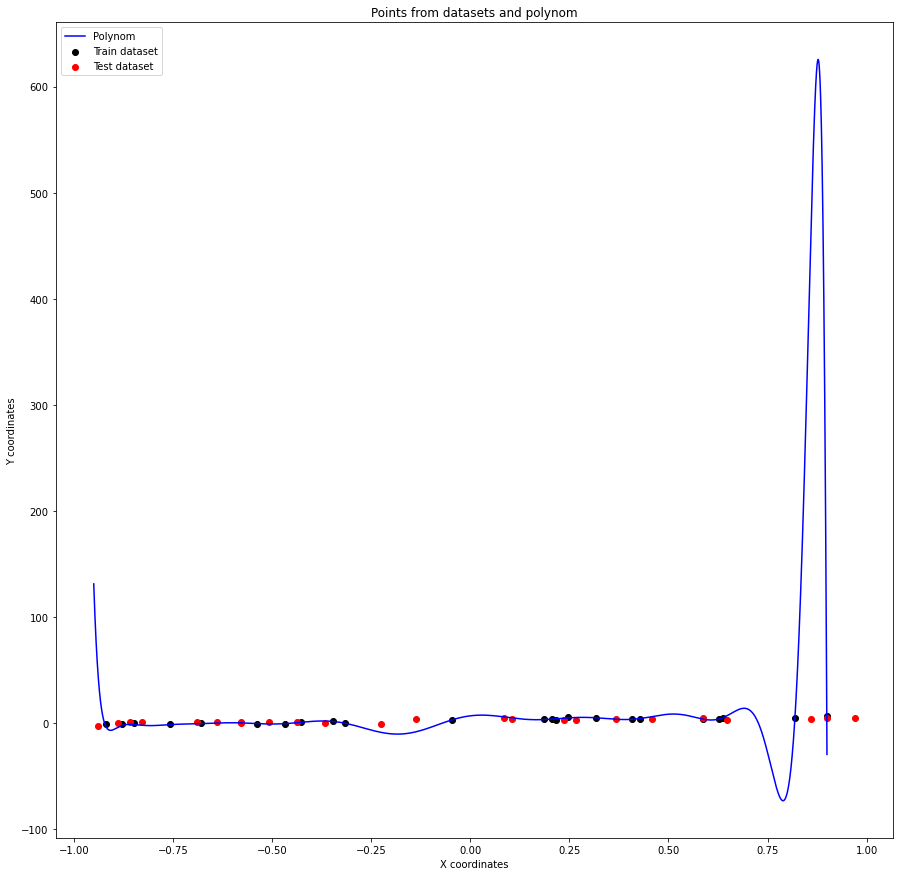

In [6]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
x = np.linspace(-0.95, 0.9, 10000)
plt.figure(figsize=(15, 15))
plt.scatter(X_train, y_train, color='black', label='Train dataset');
plt.scatter(X_test, y_test, color='red', label='Test dataset');
plt.plot(x, np.polyval(np.flip(poly_coef), x), color='blue', label='Polynom');
plt.ylabel('Y coordinates')
plt.xlabel('X coordinates')
plt.title('Points from datasets and polynom')
plt.legend()
plt.show()
#Даже не прошел через все точки обучающей выборки, из-за пошрешности вычислений в python. В предыдущем пункте были выведены значения.

**5. [0,5 балла]** Для $k = 1,2,3,\ldots,10$ найдите многочлен $\hat{f}_k$ степени $k$, наилучшим образом приближающий неизвестную зависимость. Сохраните найденные коэффициенты многочленов в матрицу `poly_coefs` (коэффициенты многочлена степени $j$ должны быть сохранены в $j$-й строке матрицы от младшего члена к старшему).

In [7]:
poly_coefs = np.zeros((10, 11))
for k in range(1, 11):
  #╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
    degree = k
    X = np.vander(X_train, degree + 1, increasing=True)
    # a = (X^T X) ^{-1} X^T y
    a = np.dot(np.dot(sla.inv(np.dot(X.T, X)),X.T), y_train.reshape((n,1)))
    poly_coef1 = a.reshape((1, degree + 1))[0]
    asd = np.zeros((1, 11 - degree - 1))
    poly_coefs[k - 1] =  np.append(poly_coef1,asd)
# Простая проверка, что матрица poly_coefs имеет столько строк, сколько нужно
assert poly_coefs.shape[0] == 10

**6. [0,6 балл]** Для каждого из многочленов из задания 1.5, а также для многочлена из задания 1.4 найдите среднеквадратическую ошибку на обучающих данных и на тестовых данных: $\frac1{n}\sum_{i=1}^n\left( \hat{f}_k(x_i) - y_i \right)^2$. Полученные значения ошибок сохраните в матрицу `errors` высоты 11 и ширины 2. В первом столбце матрицы должны стоять значения ошибок на тренировочных данных, во втором --- на тестовых. В первых 10 строках матрицы должны стоять значения ошибок для многочленов соответствующих степений из задания 1.5, в 11-й строке --- значение ошибки для многочлена из задания 1.4.

In [8]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
X = np.vander(X_train, 11, increasing=True).T
PROD = np.dot(poly_coefs, X)
Y = np.tile(y_train,(10,1))
PROD = PROD - Y
PROD = PROD ** 2
error1 = np.mean(PROD, axis=1)

X = np.vander(X_train, len(poly_coef), increasing=True).T
PROD = np.dot(poly_coef, X)
Y = y_train
PROD = PROD - Y
PROD = PROD ** 2
error_on_poly = np.mean(PROD)
error1 = np.append(error1, error_on_poly)

X = np.vander(X_test, 11, increasing=True).T
PROD = np.dot(poly_coefs, X)
Y = np.tile(y_test,(10,1))
PROD = PROD - Y
PROD = PROD ** 2
error2 = np.mean(PROD, axis=1)

X = np.vander(X_test, len(poly_coef), increasing=True).T
PROD = np.dot(poly_coef, X)
Y = y_test
PROD = PROD - Y
PROD = PROD ** 2
error_on_poly = np.mean(PROD)
error2 = np.append(error2, error_on_poly)

errors = np.concatenate((error1.reshape(-1, 1), error2.reshape(-1,1)), axis=1)
print(errors)

[[7.00912588e-01 1.64930169e+00]
 [6.91992919e-01 1.56859711e+00]
 [6.53662070e-01 1.48196170e+00]
 [4.52989800e-01 2.25266387e+00]
 [3.69973832e-01 2.41600793e+00]
 [3.69614394e-01 2.49195289e+00]
 [3.54844465e-01 3.18560667e+00]
 [3.52453365e-01 3.59296147e+00]
 [3.38277875e-01 5.26186318e+00]
 [3.32784411e-01 7.99284845e+00]
 [3.73840687e-01 1.22030172e+08]]


**7. [0,5 балла]** Для $k = 1,2,3,4,6$ нарисуйте графики полученных многочленов на одном чертеже вместе с точками $(x_i, y_i)$ из обеих выборок (возможно, график стоит сделать побольше; это делается командой `plt.figure(figsize=(width, height))`).

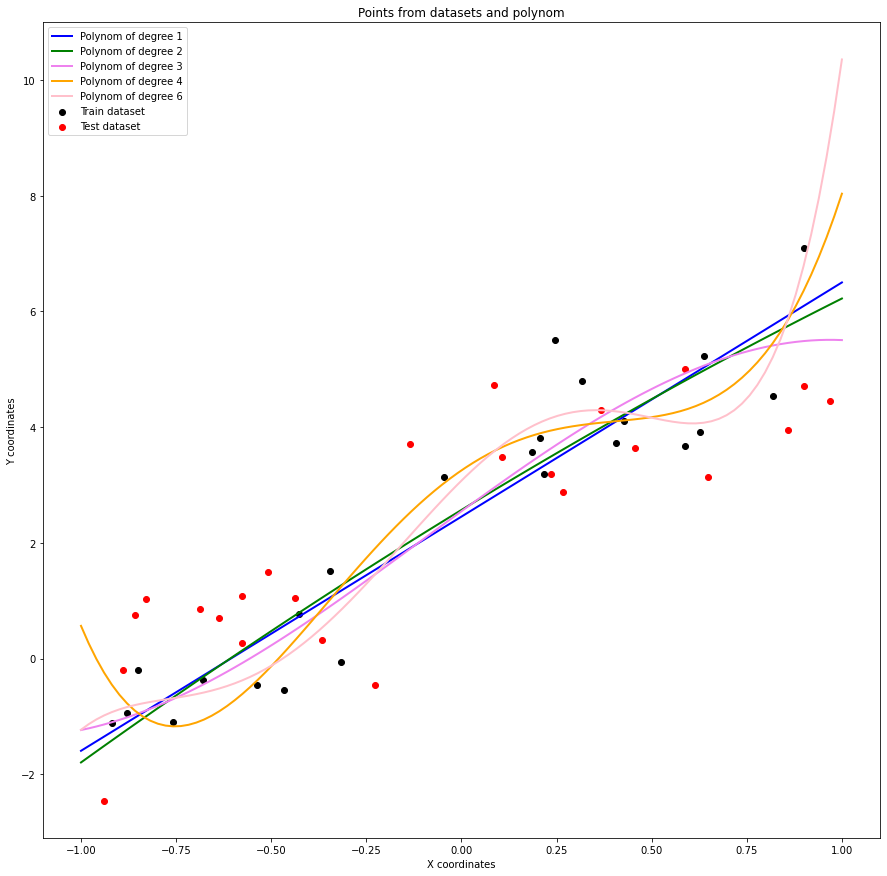

In [9]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
x = np.linspace(-1, 1, 100)
plt.figure(figsize=(15, 15))
linewidth = 2
plt.scatter(X_train, y_train, color='black', label='Train dataset');
plt.scatter(X_test, y_test, color='red', label='Test dataset');
plt.plot(x, np.polyval(np.flip(poly_coefs[0]), x), color='blue', label='Polynom of degree 1', linewidth = linewidth);
plt.plot(x, np.polyval(np.flip(poly_coefs[1]), x), color='green', label='Polynom of degree 2', linewidth = linewidth);
plt.plot(x, np.polyval(np.flip(poly_coefs[2]), x), color='violet', label='Polynom of degree 3', linewidth = linewidth);
plt.plot(x, np.polyval(np.flip(poly_coefs[3]), x), color='orange', label='Polynom of degree 4', linewidth = linewidth);
plt.plot(x, np.polyval(np.flip(poly_coefs[5]), x), color='pink', label='Polynom of degree 6', linewidth = linewidth);
plt.ylabel('Y coordinates')
plt.xlabel('X coordinates')
plt.title('Points from datasets and polynom')
plt.legend()
plt.show()

**8. [0,65 балла]** Что происходит с ошибкой на тестовых данных при росте степени многочлена? Казалось бы, чем больше степень, тем более сложным будет многочлен и тем лучше он будет приближать нашу функцию. Подтверждают ли это ваши наблюдения? Как вам кажется, чем объясняется поведение ошибки на тестовых данных при $k = 10$? Как называется наблюдаемый вами эффект?

**Ответ:** ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
Из-за погрешности вычислений, mean square error не особо изменяется при росте k на обучающей выборке, но при этом начинает разительно увеличиваться на тестовой выборке. Скорее всего это эффект "переобучения" модели на обучающей выборке.

## Часть 2: Обучаем машины

### Задание 2. Линейная регрессия (3 балла)

В этом задании вам предстоит заняться предсказанием цен на алмазы. Скачайте файл `diamonds_features.csv`, содержащий данные, с которыми вам предстоит работать. Запустите следующую ячейку:

In [10]:
data = np.loadtxt("diamonds_features.csv", delimiter=",", dtype="str")[1:, :]
print(data[:5, :])

[['0.8' 'Ideal' 'F' 'VS1' '62.4' '55.0' '5.92' '5.88' '3.68' '3884']
 ['0.91' 'Premium' 'F' 'SI2' '61.4' '60.0' '6.23' '6.21' '3.82' '3618']
 ['1.28' 'Premium' 'I' 'VS2' '61.7' '60.0' '7.05' '6.95' '4.32' '6762']
 ['0.41' 'Very Good' 'F' 'SI1' '61.9' '55.0' '4.78' '4.81' '2.97' '769']
 ['1.07' 'Premium' 'F' 'SI2' '61.8' '59.0' '6.53' '6.57' '4.05' '4560']]


Мы вывели для вас первые 5 строчек данных. Описания значений в колонках вы можете найти в файле `diamonds_descriptions.txt`.

Глобально в этом задании вам предстоит научиться строить модель линейной регрессии для предсказания цены алмаза по его признакам. Данные устроены таким образом, что в каждой строчке располагаются признаки, описывающие объект (алмаз), а в каждой фиксированной колонке --- всевозможные значения конкретного признака для всех объектов в данных.

**0. [0 баллов]** Разделите выборку на обучающую и тестовую. Делать это лучше случайным образом (ведь вы не знаете, как создатели датасета упорядочили объекты); рекомендуем вам для этого функцию [sklearn.model_selection.train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) с параметром `test_size=0.3`. Обязательно зафиксируйте параметр `random_state`.

In [11]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(data, test_size=0.3, random_state=42)
was_train_data = train_data
# последнее потом понадобится

Теперь у вас есть две выборки, каждая из которых содержит случайное подмножество наших данных. Обучающую выборку мы в дальнейшем будем использовать для обучения модели линейной регрессии, а тестовую, соответственно, для теста.

**ВАЖНО: за обучение модели на тестовой выборке будем ставить 0 за весь пункт!**

### Работаем с числовыми данными

Сейчас ваши данные содержат как привычные вам числовые признаки, описывающие объект, так и категориальные признаки, которые описывают принадлежность объекта к той или иной категории, и в данных представляются строками. Что делать с данными, которые представлены строками --- мы разберёмся чуть позже, а пока давайте забудем, что они у нас есть, и будем работать только с числовыми.

**0,5. [0 баллов]** Заполните переменные `numeric_features` и `categorical_features` индексами столбцов в данных, содержащих числовые и категориальные признаки соответственно. После этого можно проверить, что массив `data[:, numeric_features]` содержит только числовые данные.

In [12]:
# ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
numeric_features = [0, 4, 5, 6, 7, 8]
categorical_features = [1, 2, 3]
print(data[:, numeric_features])

[['0.8' '62.4' '55.0' '5.92' '5.88' '3.68']
 ['0.91' '61.4' '60.0' '6.23' '6.21' '3.82']
 ['1.28' '61.7' '60.0' '7.05' '6.95' '4.32']
 ...
 ['0.31' '61.4' '56.0' '4.38' '4.41' '2.7']
 ['0.36' '62.0' '59.0' '4.56' '4.51' '2.81']
 ['0.31' '59.0' '62.0' '4.41' '4.43' '2.61']]


**1. [0,3 баллов]** Решите задачу линейной регрессии для предсказания цены алмаза по его числовым признакам (не забудьте, что линейная модель должна также содержать свободный от признаков член) и протестируйте ваше решение на тестовых данных. Выведите полученные регрессионные коэффициенты для каждого признака. Попробуйте проинтерпретировать полученные коэффициенты: сравните их друг с другом, посмотрите на их знаки и на абсолютную величину и попробуйте на основе этого придать им житейский смысл. Согласуется ли построенная интерпретация модели с вашими представлениями о жизни? 

*Примечание: обратите внимание, сейчас все данные у вас хранятся в строковом виде. Чтобы работать с ними как с числами, необоходимо явно привести их к типу float. В NumPy для этого есть специальная удобная команда astype.*

In [13]:
# ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
y_train = train_data[:, 9]
y_train = y_train.astype(np.float64)
y_test = test_data[:, 9]
y_test = y_test.astype(np.float64)
n = len(train_data)
X = np.ones(n).reshape((n,1))
m = len(test_data)
Xx = np.ones(m).reshape((m,1))
for i in range(0, len(numeric_features)):
    X_train = train_data[:, numeric_features[i]]
    X_train = X_train.astype(np.float64)
    X = np.concatenate((X, X_train.reshape((n,1))), axis=1)
    X_test = test_data[:, numeric_features[i]]
    X_test = X_test.astype(np.float64)
    Xx = np.concatenate((Xx, X_test.reshape((m,1))), axis=1)
#   a = (X^T X) ^{-1} X^T y
a = np.dot(np.dot(sla.inv(np.dot(X.T, X)), X.T), y_train.reshape((n,1)))
print("const coef = ", a[0][0])
print("carat coef = ", a[1][0])
print("depth coef = ", a[2][0])
print("table coef = ", a[3][0])
print("x coef = ", a[4][0])
print("y coef = ", a[5][0])
print("z coef = ", a[6][0])
print("error on test_data = ", np.mean((np.dot(Xx, a) - y_test.astype(np.float64).reshape((m,1)))**2))

const coef =  20320.69383296099
carat coef =  10786.237940084633
depth coef =  -199.27867511174284
table coef =  -95.04055850936591
x coef =  -1308.080110177184
y coef =  24.327258330699948
z coef =  37.048252159628206
error on test_data =  2113575.9171203002


Интерпретация модели здесь: ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
Логично, что наибольшее значение оказывает вес алмаза.
Как-то странно, что чем длинее алмаз, тем меньше его цена и это сильно влияет на значение, а, напротив, ширина и глубина не сильно влияют. И странно, по-факту у нас много характеристик, но все кроме x и carat по-факту почти не влияют на цену, мы можем их выкинуть и цена не сильно изменится.

Если вы всё сделали правильно, у вас должны были получиться довольно большие по абсолютной величине коэффициенты.

**2. [0,15 баллов]** Попробуйте объяснить, почему ситуация, когда модель имеет большие по модулю коэффиценты, нежелательна?

Подсказка: Вы можете попытаться проиллюстрировать свои рассуждения, искусственно описав с помощью исследуемых признаков два алмаза, которые по вашему мнению должны иметь одинаковую цену, и проверить, выдаст ли построенная модель близкие предсказания на этих объектах.

Ваше обоснование здесь: ╰( ͡° ͜ʖ ͡° )つ──☆*:・ Малое изменение параметра, может сильно менять цену. Допустим у нас есть два одинаковый алмаза, но один из них чуть плотнее, и поэтому у него вес больше на eps, но в нашей модели это значит, что его цена сильно больше чем цена другого алмаза, хотя по-факту, она должна незначительно отличаться. Другими словами, мы можем сильно недооценивать какие-то параметры, из-за того, что коэффициенты при них относительно малы чем коэффициенты перед другими параметрами. Еще добавляется погрешность в вычислениях из-за больших коэффициентов.

**3. [0.2 баллов]** Нарисуйте гистограмму, характеризующую распределение объясняемой переменной в обучающей выборке. На такой диаграмме по оси `x` должны быть сгруппированные значения объясняемой переменной, а по оси `y` --- количество объектов выборки с таким значением. Столбцов на вашем графике должно быть не менее 50.

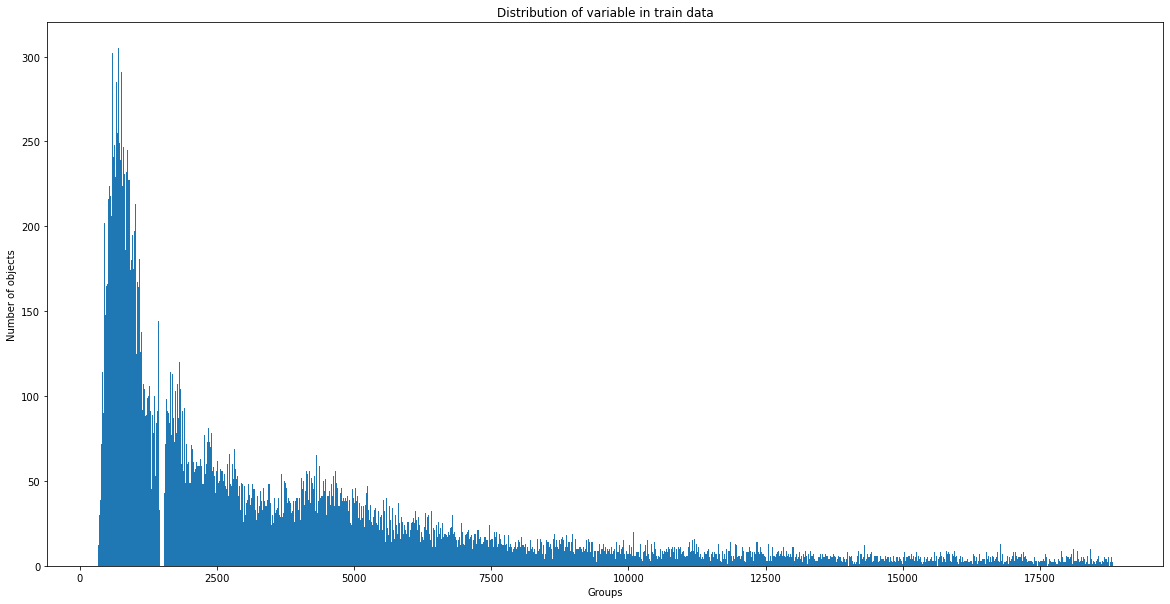

In [14]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
plt.figure(figsize=(20, 10))
plt.hist(y_train.astype(np.float64), bins=1000)
plt.ylabel('Number of objects')
plt.xlabel('Groups')
plt.title('Distribution of variable in train data')
plt.show()

В левой части гистограммы располагаются небольшие значения целевой переменной, и объектов с таким значением в выборке довольно много (не забываем, что у нас тут не абстрактная математика в вакууме, мы тут цену алмазов предсказываем!); с увеличением значения таргета (целевой переменной) количество соответствующих объектов в выборке убывает. Сначала число объектов убывает довольно стремительно, но с некоторого момента разница в высоте между соседними столбцами уже почти незаметна. Такое явление называется "распределение с тяжёлым хвостом", и оно не очень желательно при построении модели.

Попробуем избавиться от тяжёлого хвоста. Для этого нужно применить к таргету какую-нибудь медленнорастущую биективную функцию, например логарифм. 

<!-- Однако вспомним, что мы намеренно отмасштабировали таргет таким образом, чтобы среди его значений был 0, поэтому нужно придумать ещё какое-то преобразование, чтобы все значения целевой переменной попали в область определения логарифма. -->

**4. [0,25 баллов]** Прологарифмируйте целевую переменную и нарисуйте график распределения логарифмированного таргета. Сильно ли он отличается от предыдущего графика? Попробуйте объяснить, почему явление "распределения с тяжёлым хвостом" нежелательно при построении модели.

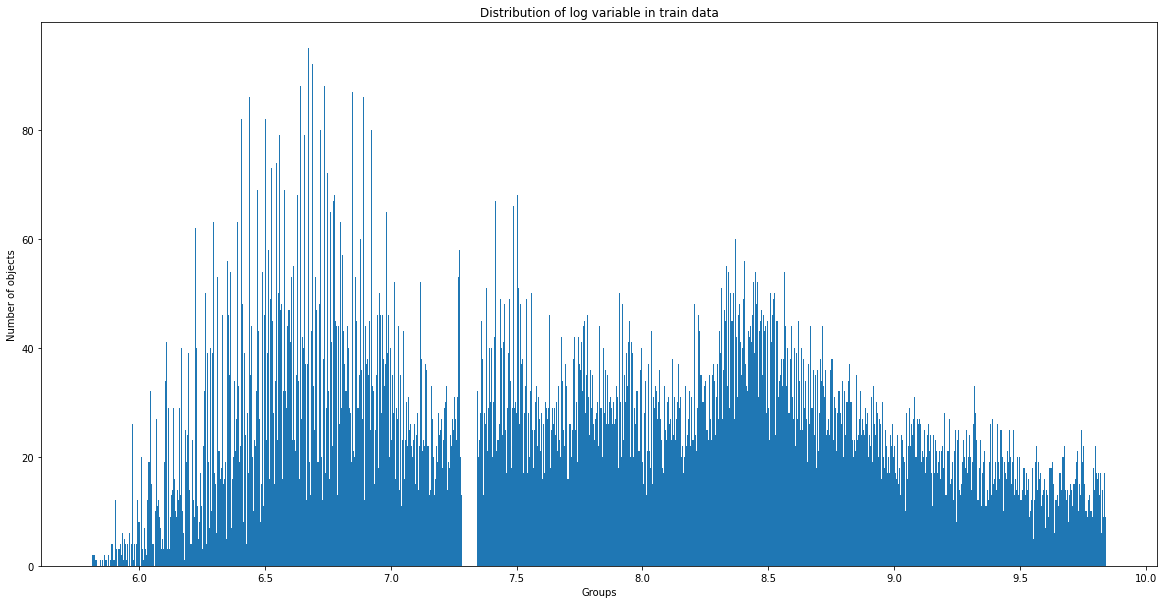

In [15]:
# ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
plt.figure(figsize=(20, 10))
plt.hist(np.log(y_train.astype(np.float64)), bins=1000)
plt.ylabel('Number of objects')
plt.xlabel('Groups')
plt.title('Distribution of log variable in train data')
plt.show()

Ваше обоснование здесь: ╰( ͡° ͜ʖ ͡° )つ──☆*:・ Сильно.
В исходном случае, модель у нас обучалась в основном на алмазах, которых сильно много, а здесь она достаточно равномерно будет обучаться.

Снова обучите линейную модель, считая целевой переменной логарифмированный таргет. Помните, что чтобы протестировать полученную линейную модель, важно взять экспоненту от полученных предсказаний.

In [16]:
# ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
y_train = train_data[:, 9]
y_train = y_train.astype(np.float64)
y_train = np.log(y_train)
y_test = test_data[:, 9]
y_test = y_test.astype(np.float64)
n = len(train_data)
X = np.ones(n).reshape((n,1))
m = len(test_data)
Xx = np.ones(m).reshape((m,1))
for i in range(0, len(numeric_features)):
    X_train = train_data[:, numeric_features[i]]
    X_train = X_train.astype(np.float64)
    X = np.concatenate((X, X_train.reshape((n,1))), axis=1)
    X_test = test_data[:, numeric_features[i]]
    X_test = X_test.astype(np.float64)
    Xx = np.concatenate((Xx, X_test.reshape((m,1))), axis=1)
#   a = (X^T X) ^{-1} X^T y
a = np.dot(np.dot(sla.inv(np.dot(X.T, X)), X.T), y_train.reshape((n,1)))
print("error on test_data = ", np.mean((np.exp(np.dot(Xx, a)) - y_test.astype(np.float64).reshape((m,1)))**2))

error on test_data =  2514576.8902115608


Удалось ли добиться лучшего качества?

Ответ: ╰( ͡° ͜ʖ ͡° )つ──☆*:・ Нет, сильно хуже стало.

### Работаем с категориальными признаками

До сих пор мы работали с данными, которые представляются числами. Однако часто в датасетах объекты описываются не только признаками, содержащими числа, но и строковыми признаками, определяющими принадлежность объекта к некоторой категории. Такие признаки называются категориальными. Важно не выкидывать их из модели, потому что часто они содержат довольно полезную информацию об объекте, которую хорошая модель должна обязательно учитывать.

В этом разделе мы будем рассматривать только категориальные признаки, временно забыв про числовые.

Естесственно, нам нужно придумать, как закодировать категориальные признаки числами. Есть довольно много подходов к такой кодировке, но мы рассмотрим два самых базовых. Первая мысль, которая приходит в голову такая: давайте занумеруем все категории фиксированного признака, и заменим их строковое представление соответствующим численным.

**5. [0,3 баллов]** Реализуйте описанную выше процедуру кодирования для всех категориальных признаков в выборке. Вы можете сделать это самостоятельно, а можете разобраться в классе `OrdinalEncoder` библиотеки `sklearn`. Обучите линейную модель на закодированных категориальных признаках и протестируйте. 

In [17]:
# ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
from sklearn.preprocessing import OrdinalEncoder

cut = ['Ideal', 'Premium', 'Very Good', 'Good', 'Fair']
color = ['D', 'E', 'F', 'G', 'H', 'I', 'J']
clarity = ['IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1']

n = len(train_data)
X = np.ones(n).reshape((n,1))
y_train = train_data[:, 9]
y_train = y_train.astype(np.float64)
y_test = test_data[:, 9]
y_test = y_test.astype(np.float64)
m = len(test_data)
Xx = np.ones(m).reshape((m,1))
for i in range(0, len(categorical_features)):
    if i == 0:
        encode = OrdinalEncoder(categories=[cut])
    elif i == 1:
        encode = OrdinalEncoder(categories=[color])
    else:
        encode = OrdinalEncoder(categories=[clarity])
    X_train = train_data[:, categorical_features[i]]
    X_train = encode.fit_transform(X_train.reshape(-1, 1)).reshape(1, -1)
    X_train = X_train.astype(np.float64)
    X = np.concatenate((X, X_train.reshape((n,1))), axis=1)
    
    X_test = test_data[:, categorical_features[i]]
    X_test = encode.fit_transform(X_test.reshape(-1, 1)).reshape(1, -1)
    X_test = X_test.astype(np.float64)
    Xx = np.concatenate((Xx, X_test.reshape((m,1))), axis=1)
a = np.dot(np.dot(sla.inv(np.dot(X.T, X)), X.T), y_train.reshape((n,1)))
print("error on test_data = ", np.mean((np.dot(Xx, a) - y_test.astype(np.float64).reshape((m,1)))**2))

error on test_data =  14772316.034174327


Подумайте, в чём потенциальные проблемы такого кодирования? (Подсказка: пусть изначально мы закодировали категорию A числом 1, а категорию B числом 2, а потом решили сделать наоборот: A <-> 2, B <-> 1. Подумайте, может ли измениться качество модели? А должно ли?)

Ваше обоснование здесь: ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ Так как у нас линенай зависиомость между тем, что мы сопоставляем признаку и коэффициенту, то если мы поменяем местами A и B, модель измениться, но "по-идее", модель не должна зависеть от порядка параментров.


Теперь давайте попробуем исправить недочёты такого способа кодирования категориальных признаков, придумав другой метод. Пусть некоторый признак имеет 4 различные категории: {A, B, C, D}. Заменим этот признак на 4 бинарных признака. Каждый из новых признаков будет являться индикатором одной из этих четырёх категорий: если некоторый объект имел категорию A, то после нашего кодирования значение признака, соответствующего категории А у этого объекта будет равно $1$, а значения оставшихся трёх признаков будут $0$. Небольшая иллюстрация: пусть так выглядела выборка до кодирования

| Объект | Признак |
| :----------:|:-:|
| X | "B" |
| Y | "D" |

А так будет выглядеть после кодирования:

| Объект | Признак == "A" | Признак == "B" | Признак == "C" | Признак == "D" |
| :----------:|:-:|:-:|:-:|:-:|
| X | 0 | 1 | 0 | 0 |
| Y | 0 | 0 | 0 | 1 |


**6. [0,3 баллов]** Реализуйте описанную выше процедуру кодирования для всех категориальных признаков в выборке. Вы можете сделать это самостоятельно, а можете разобраться в классе `OneHotEncoder` библиотеки `sklearn`. Обучите линейную модель на закодированных категориальных признаках и протестируйте. 

In [18]:
# ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
from sklearn.preprocessing import OneHotEncoder

n = len(train_data)
X = np.ones(n).reshape((n,1))
y_train = train_data[:, 9]
y_train = y_train.astype(np.float64)
y_test = test_data[:, 9]
y_test = y_test.astype(np.float64)
m = len(test_data)
Xx = np.ones(m).reshape((m,1))
for i in range(0, len(categorical_features)):
    encode = OneHotEncoder(sparse=False)
    X_train = train_data[:, categorical_features[i]]
    X_train = encode.fit_transform(X_train.reshape(-1, 1))
    X_train = X_train.astype(np.float64)
    for j in range(0, len(X_train[0])):
        Y = np.concatenate((X, X_train[:, j].reshape(-1,1)), axis=1)
        if np.linalg.matrix_rank(Y) == len(Y[0]):
            X = Y
    
    X_test = test_data[:, categorical_features[i]]
    X_test = encode.fit_transform(X_test.reshape(-1, 1))
    X_test = X_test.astype(np.float64)
    for j in range(0, len(X_test[0])):
        Y = np.concatenate((Xx, X_test[:, j].reshape(-1,1)), axis=1)
        if np.linalg.matrix_rank(Y) == len(Y[0]):
            Xx = Y
a = np.dot(np.dot(sla.inv(np.dot(X.T, X)), X.T), y_train.reshape((n,1)))
print("error on test_data = ", np.mean((np.dot(Xx, a) - y_test.astype(np.float64).reshape((m,1)))**2))

error on test_data =  14620759.561162049


Подумайте, в чём потенциальные проблемы такого кодирования? Какие недочёты прошлого метода кодирования исправляет предложенный способ? Какие недочёты есть у этого метода кодирования, которых нет у предыдущего? Который из двух методов выдаёт лучшее качество?

Ваше обоснование здесь: ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ Добавляем слишком много новых параметров, которые зависят от исходных, из-за этого может быть переобучения. Но теперь у нас модель не зависит от порядка, в котором мы пронумеровали переменные:)).

**7. [0,5 баллов]** Обучите линейную модель на всех данных, выполнив все необходимые преобразования. Постарайтесь добиться меньшей ошибки модели, чем во всех предыдущих заданиях.

In [19]:
# ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
from sklearn.preprocessing import OrdinalEncoder

cut = ['Ideal', 'Premium', 'Very Good', 'Good', 'Fair']
color = ['D', 'E', 'F', 'G', 'H', 'I', 'J']
clarity = ['IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1']

n = len(train_data)
X = np.ones(n).reshape((n,1))
y_train = train_data[:, 9]
y_train = y_train.astype(np.float64)
y_train = np.log(y_train)
y_test = test_data[:, 9]
y_test = y_test.astype(np.float64)
m = len(test_data)
Xx = np.ones(m).reshape((m,1))
for i in range(0, len(categorical_features)):
    if i == 0:
        encode = OrdinalEncoder(categories=[cut])
    elif i == 1:
        encode = OrdinalEncoder(categories=[color])
    else:
        encode = OrdinalEncoder(categories=[clarity])
    X_train = train_data[:, categorical_features[i]]
    X_train = encode.fit_transform(X_train.reshape(-1, 1)).reshape(1, -1)
    X_train = X_train.astype(np.float64)
    X = np.concatenate((X, X_train.reshape((n,1))), axis=1)
    
    X_test = test_data[:, categorical_features[i]]
    X_test = encode.fit_transform(X_test.reshape(-1, 1)).reshape(1, -1)
    X_test = X_test.astype(np.float64)
    Xx = np.concatenate((Xx, X_test.reshape((m,1))), axis=1)
for i in range(0, len(numeric_features)):
    X_train = train_data[:, numeric_features[i]]
    X_train = X_train.astype(np.float64)
    X = np.concatenate((X, X_train.reshape((n,1))), axis=1)
    X_test = test_data[:, numeric_features[i]]
    X_test = X_test.astype(np.float64)
    Xx = np.concatenate((Xx, X_test.reshape((m,1))), axis=1)    
a = np.dot(np.dot(sla.inv(np.dot(X.T, X)), X.T), y_train.reshape((n,1)))
print("error on test_data = ", np.mean((np.exp(np.dot(Xx, a)) - y_test.astype(np.float64).reshape((m,1)))**2))

error on test_data =  1072613.4942525872


### Feature engineering

#### Описание задания.

В рамках этого задания вам предстоит улучшить модель и сделать предсказания на выборке из файла`diamonds_test.csv`, ответов к которой мы вам не дадим. Полученные предсказания вам нужно будет сдать в соревнование на сайте [kaggle.com](https://www.kaggle.com/c/hse-lab-linear-regression-21-22/overview). Подробнее о том, как сдавать предсказания, написано в конце раздела. Разумеется, чтобы иметь возможность сдать предсказания, вам нужно быть зарегистрированными на сайте. 

Оценка за задание рассчитывается исходя из ошибки полученных вами предсказаний и состоит из базовой части и бонусных баллов. Базовая часть оценки определяется следующими пороговыми значениями качества:

*   MSE $\leq 1950000$ ---- 0,25 балла
*   MSE $\leq 1370000$ ---- 0,5 балла
*   MSE $\leq 1280000$ ---- 0,75 балла
*   MSE $\leq 1170000$ ---- 1 балл

Если ваша модель выдаёт качество сильно лучше, чем требуется в пороге на 1 балл, то вы можете претендовать на бонусные баллы, приняв участие в полноценном соревновании, смысл которого в том, чтобы получить качество как можно лучше (добиться наименьшей возможной ошибки). 

Если вы хотите поучаствовать, то просто продолжайте улучшать вашу модель и сдавать предсказания в соревнование. Бонусные баллы будут рассчитываться на основе ошибки полученных вами предсказаний и вашей позиции в лидерборде соревнования. Как именно будет рассчитываться оценка --- мы вам сообщим после завершения соревнования. Точно можем сказать, что наибольшее число баллов за задание получит только один студент --- тот, кто будет находиться на первой позиции в лидерборде на момент дедлайна. Человек на следующем месте уже получит немного меньше, следующий --- ещё меньше, и так далее. Каждый студент, качество предсказаний которого хоть немного лучше нашего порога на 1 балл, обязательно получит бонусные баллы.

Чтобы подтвердить своё участие в соревновании, вам нужно будет сдать вашу модель вместе с лабораторной (лучше в отдельном файле, но можно её и прямо здесь написать).

**Максимум бонусных баллов за задание: 3**



---



В оставшейся части данного раздела приводятся несколько заданий, за выполнение котороых вы не получите баллов. Эти задания даны специально, чтобы вы посмотрели, какие есть идеи для дальнейшего улучшения модели.  Разумеется, мы не требуем от вас, чтобы ваша финальная модель следовала указаниям из этих заданий --- вы можете вообще не выполнять ни одного задания отсюда, оцениваться будут только сданные вами предсказания.





До сих пор мы только исследовали вопрос, как подготовить признаки из датасета, чтобы модель могла на их основе делать какие-то предсказания. При этом до сих пор мы никак не учитывали специфичность задачи: действительно, до этого момента нас интересовало только то, является ли признак числовым или категориальным, мы никак не учитывали физический смысл признаков. Однако часто датасеты предоставляют лишь самую общую информацию об объектах: признаки, которые легко измерить и запомнить. В таком случае при анализе данных нужно выдумывать собственные признаки, которые некоторым образом зависят от уже представленных в датасете признаков и **ни в коем случае не зависят от объясняемой переменной**.

В общем случае процесс придумывания новых признаков довольно творческий. Есть, конечно, некоторые более-менее общие подходы, позволяющие улучшить качество модели путём добавления новых признаков, но часто аналитики придумывают признаки, основываясь не только на известных эвристиках, но и на собственном представлении о жизни.

Давайте теперь поисследуем наши данные и подумаем, какие признаки можно добавить, чтобы улучшить модель.

**8.** Нарисуйте графики, отображающие зависимость цены алмаза от веса, длины, ширины и глубины (всего должно получиться 4 графика). Проинтерпретируйте наблюдаемую на них зависимость. Согласуется ли она с вашими представлениями о жизни?

*Примечание: для изображения зависимости одной величины от другой лучше всего подходит график типа scatter.*

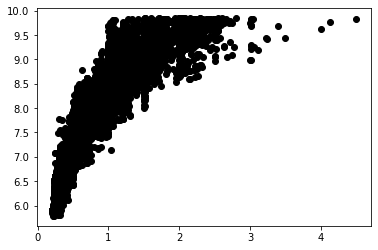

In [20]:
# ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

X_train = data[:, 0].astype(np.float64)

y_train = data[:, 9].astype(np.float64)
y_train = np.log(y_train)

plt.scatter(X_train, y_train, color='black', label='Train dataset');
X_train.sort()
#for i in range(0, len(X_train)):
#    print(X_train[len(X_train) - 1 - i])
#                                                    So carat  should be < 3.
# X_train = train_data[:, 4].astype(np.float64)
# plt.scatter(X_train, y_train, color='black', label='Train dataset');
# X_train.sort()
# for i in range(0, len(X_train)):
#     print(X_train[len(X_train) - 1 - i])
#                                                     So we should consider if depth < 72 && depth > 55 
# X_train = train_data[:, 5].astype(np.float64)
# plt.scatter(X_train, y_train, color='black', label='Train dataset');
# X_train.sort()
# for i in range(0, len(X_train)):
#     print(X_train[len(X_train) - 1 - i])
#                                                     So we should consider if table < 71 && teble >= 52
# X_train = train_data[:, 6].astype(np.float64)
# plt.scatter(X_train, y_train, color='black', label='Train dataset');
# X_train.sort()
# for i in range(0, len(X_train)):
#     print(X_train[len(X_train) - 1 - i])
#                                                     So we should consider if x >= 3.85 && x < 8.93
# X_train = train_data[:, 7].astype(np.float64)
# plt.scatter(X_train, y_train, color='black', label='Train dataset');
# X_train.sort()
# for i in range(0, len(X_train)):
#     print(X_train[len(X_train) - 1 - i])
#                                                     So we should consider if y < 9 && y >= 3.8
# X_train = train_data[:, 8].astype(np.float64)
# plt.scatter(X_train, y_train, color='black', label='Train dataset');
# X_train.sort()
# for i in range(0, len(X_train)):
#     print(X_train[len(X_train) - 1 - i])
#                                                     So we should consider if z <= 5.5 && z >= 2.3
# const coef =  20320.69383296099
# carat coef =  10786.237940084633
# depth coef =  -199.27867511174284
# table coef =  -95.04055850936591
# x coef =  -1308.080110177184
# y coef =  24.327258330699948
# z coef =  37.048252159628206
# error on test_data =  2113575.9171203002

Подумайте, какую функцию можно применить к признакам, чтобы зависимость целевой переменной от них больше напоминала линейную?

Ваше обоснование здесь: ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

**9.** На одном рисунке изобразите график зависимости целевой переменной от признака depth и график зависимости целевой переменной от признака table. Чтобы картинка получилась читаемой, сделайте графики полупрозрачными (параметр `alpha`). Что вы можете сказать о получившемся рисунке? Правда ли, что модели будет достаточно оставить только один из этих признаков? Убедитесь в этом, нарисовав аналогичные графики зависимости признаков depth и table от других числовых признаков.

*Примечание: почитайте про plt.subplots, чтобы узнать, как красиво рисовать несколько графиков.*

In [21]:
# ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Казалось бы, мы тут пытаемся придумать новые признаки, чтобы улучшить модель, зачем нам выбрасывать уже имеющиеся признаки? Дело в том, что если в выборке есть "похожие" в некотором смысле признаки, то модель, обученная на таких данных, может выдавать худший результат, чем если бы похожих признаков в выборке не было. Продемонстрируем это явление на практике.

**10.** Обучите линейную модель, предсказывающую цену алмазов на признаках x, y, z из наших данных. Замерьте качество полученной линейной модели на тестовой выборке, после чего добавьте признак $\tau = \frac{x}{2} + 4y - z + 1$, и снова обучите линейную модель. Которая из моделей добилась лучшего качества?

In [22]:
# ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Объясните, почему наличие похожих признаков в выборке заметно ухудшает качество, выдаваемое линейной моделью?

Ваше обоснование здесь: ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Итак, мы обсудили, исходя из каких соображений можно выбирать преобразования над имеющимися признаками и когда для модели может быть полезнее выкинуть некоторый признак из выборки, чем оставить его. Теперь давайте придумаем совсем новый признак. Для этого снова посмотрим на такие характеристики алмазов, как длина, ширина и глубина. Эти характеристики несомненно важны для предсказания цены алмазов, и все построенные нами модели находили какую-то закономерность, но теперь давайте мы попробуем их объединить в новом признаке `объём`. Для начала будем считать, что объём алмаза неплохо приближается объёмом параллелепипеда с такими же измерениями.

**11.** Обучите линейную модель на 4 признаках: x, y, z, и объём параллелепипеда со сторонами (x, y, z). Сравните качество полученной модели с качеством, выдаваемым моделью, обученной на признаках x, y, z.

In [75]:
# ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Понятно, что алмазы редко выглядят как идеальные параллелепипеды (хотя, конечно, многое зависит от огранки), и чаще встречаются алмазы, форма которых скорее напоминает эллипсоид. Снова обучите линейную модель на 4 признаках: x, y, z и объём эллипсоида с осями (x, y, z). Сравните полученную модель с предыдущей. Сильно ли отличается качество у этих моделей? Объясните, почему так получилось?

In [76]:
# ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Если вам стало интересно, можете попробовать обучить модель, аппроксимируя объём алмаза объёмом тетраэдра. Впрочем, если вы ответили на предыдущий вопрос, вы уже наверняка представляете, что получится. В любом случае мы не настаиваем =)

Следующий трюк, который мы обсудим, --- это бинаризация признаков. Суть заключается в том, что мы берём некоторый признак из выборки и делаем из него несколько бинарных признаков (т.е. таких признаков, значения которых могут быть либо $0$, либо $1$). Частный случай бинаризации признаков мы уже разбирали, когда занимались кодированием категориальных признаков: тогда мы брали признак $P$, описывающий принадлежность объекта к одной из $N$ категорий ${A_1, \ldots, A_N}$, и делали из него $N$ признаков вида $[P = A_1], [P = A_2], \ldots [P = A_N]$.

Однако это не единственный способ бинаризовать признаки. Допустим $P$ --- числовой признак, тогда мы, например, можем выбрать $k$ порогов ${t_1, \ldots, t_k}$ и превратить признак $P$ в $k$ бинарных признаков $[P \leq t_1], [t_1 < P \leq t_2], \ldots, [t_{k-1} < P \leq t_k]$.

Если же у нас есть два признака $P$ и $F$, мы можем применять булевы операции к их бинаризациям, например $[P < t_1 \vee F > h_1], [t_2 < P \leq t_3 \wedge h_2 \leq F \leq h_3], [(P = t_4 \vee F = h_4) \wedge P \leq t_5]$, и т.д.

Давайте с помощью бинаризации выделим объекты, цена которых скорее всего будет высокой, и объекты, цена которых скорее всего будет низкой. Делать мы это будем на основе категориальных признаков (закодированных любым способом, однако если вы предпочитаете кодирование бинаризацией, т.е. второй способ, то при выполнении задания не забывайте, что признаки должны быть линейно независимы). Чтобы вы понимали, как именно категориальные признаки характеризуют алмазы, мы приложили вам картинку `categorical_descriptions`.

![](https://lh3.google.com/u/0/d/1xzqbnwyOazKNiiJxNo_AUh7iUsTONC-0=w1920-h1090-iv1)

**12.** Обучите линейную модель, предсказывающую цену алмазов на категориальных признаках из наших данных. Замерьте качество полученной линейной модели на тестовой выборке, после чего добавьте признаки, которые явно выделят алмазы, цена на которые скорее всего будет высокой, и алмазы, цена которых скорее всего будет низкой, и снова обучите линейную модель. Вы можете также добавить и свои признаки и использовать не только категориальные признаки (например, если вам захочется добавить признак "у алмаза лучшая чистота И алмаз совершенно бесцветный И объём алмаза не меньше $t$"). Удалось ли добиться прироста в качестве?

In [77]:
# ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

#### Как сдавать предсказания?

Передайте в написанную нами функцию `make_submission` ваши предсказания. Когда функция отработает, у вас в рабочей директории появится файл `submission.csv`, который вам и нужно сдать в соревнование.

In [156]:
def make_submission(y_pred):
  file = np.arange(1, len(y_pred) + 1)
  file = file.reshape(-1, 1)
  file = np.concatenate([file, y_pred.reshape(-1, 1).astype(float)], axis=1)
  with open("submission.csv", "w") as f:
    f.write("id,price\n")
    np.savetxt(f, file, delimiter=",", fmt="%d,%10.5f")

# ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PolynomialFeatures
def add_polynomial_features(features, degree):
  features = features.T
  poly = PolynomialFeatures(degree=(degree,degree), include_bias = False)
  features = poly.fit_transform(features)
  return features.T

def add_polynomial_features_without_sq(features, degree):
  features = features.T
  poly = PolynomialFeatures(degree=(degree,degree), include_bias = False, interaction_only = True)
  features = poly.fit_transform(features)
  return features.T

submit_data = np.loadtxt("diamonds_test.csv", delimiter=",", dtype="str")[1:, :]

was_submit_data = np.copy(submit_data)

data = np.loadtxt("diamonds_features.csv", delimiter=",", dtype="str")[1:, :]

was_data = np.copy(data)
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(data, test_size=0.3, random_state=42)
train_data, validation_data = train_test_split(train_data, test_size=0.2, random_state=42)
# train_data = data
# test_data = np.copy(data)
# validation_data = np.copy(data)
from sklearn.preprocessing import OrdinalEncoder



numeric_features = [0, 4, 5, 6, 7, 8]
categorical_features = [1, 2, 3]

cut = ['Ideal', 'Premium', 'Very Good', 'Good', 'Fair']
color = ['D', 'E', 'F', 'G', 'H', 'I', 'J']
clarity = ['IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1']

#  So carat  should be < 3.
#  So we should consider if depth < 72 && depth > 55 
#  So we should consider if table < 71 && table >= 52
#  So we should consider if x >= 3.85 && x < 8.93
#  So we should consider if y < 9 && y >= 3.8
#  So we should consider if z <= 5.5 && z >= 2.3
# ASD = train_data[:, numeric_features].astype(np.float64)
# good = (ASD[:,0] < 3) & (ASD[:,1] < 72) & (ASD[:,1] > 55) & (ASD[:,2] >= 52) & (ASD[:,2] < 71) & (ASD[:,3] >= 3.85) & (ASD[:,3] < 8.93) 
# good = (ASD[:,3] < 10) & (ASD[:,4] < 10) & (ASD[:,5] < 10)
#train_data = train_data[good]
n = len(train_data)
X = np.ones(n).reshape((n,1))
y_train = train_data[:, 9]
y_train = y_train.astype(np.float64)
y_train = np.log(y_train)

f = len(test_data)
Xx_test = np.ones(f).reshape((f,1))
y_test = test_data[:, 9]
y_test = y_test.astype(np.float64)

m = len(validation_data)
Xx_validation = np.ones(m).reshape((m,1))
y_validation = validation_data[:, 9]
y_validation = y_validation.astype(np.float64)

k = len(submit_data)
Xx_submit = np.ones(k).reshape((k,1))
all1 = ['Ideal', 'Premium', 'Very Good', 'Good', 'Fair']
all2 = ['D', 'E', 'F', 'G', 'H', 'I', 'J']
all3 = ['IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1']
dict = {
    'Ideal':     10.0,
    'Premium':   8.0,
    'Very Good': 2.0,
    'Good':      1.0,
    'Fair':      0.1,
    
    'D': 6.0,
    'E': 5.0,
    'F': 4.0,
    'G': 3.0,
    'H': 2.0,
    'I': 1.0,
    'J': 0.1,
    
    'IF':   7.0, 
    'VVS1': 6.0, 
    'VVS2': 5.0, 
    'VS1':  4.0, 
    'VS2':  3.0, 
    'SI1':  2.0, 
    'SI2':  1.0, 
    'I1':   0.05
}

encode = np.vectorize(lambda x : dict[x])
for i in range(0, len(categorical_features)):
    encodee = OneHotEncoder(sparse=False)
    
    X_train = train_data[:, categorical_features[i]]
    X_train = encodee.fit_transform(X_train.reshape(-1, 1))
    X_train = X_train.astype(np.float64)
    for j in range(0, len(X_train[0])):
        Y = np.concatenate((X, X_train[:, j].reshape(-1,1)), axis=1)
        if np.linalg.matrix_rank(Y) == len(Y[0]):
            X = Y
    
    X_test = test_data[:, categorical_features[i]]
    X_test = encodee.fit_transform(X_test.reshape(-1, 1))
    X_test = X_test.astype(np.float64)
    for j in range(0, len(X_test[0])):
        Y = np.concatenate((Xx_test, X_test[:, j].reshape(-1,1)), axis=1)
        if np.linalg.matrix_rank(Y) == len(Y[0]):
            Xx_test = Y
            
    X_validation = validation_data[:, categorical_features[i]]
    X_validation = encodee.fit_transform(X_validation.reshape(-1, 1))
    X_validation = X_validation.astype(np.float64)
    for j in range(0, len(X_validation[0])):
        Y = np.concatenate((Xx_validation, X_validation[:, j].reshape(-1,1)), axis=1)
        if np.linalg.matrix_rank(Y) == len(Y[0]):
            Xx_validation = Y        
    
    X_submit = submit_data[:, categorical_features[i]]
    X_submit = encodee.fit_transform(X_submit.reshape(-1, 1))
    X_submit = X_submit.astype(np.float64)
    for j in range(0, len(X_submit[0])):
        Y = np.concatenate((Xx_submit, X_submit[:, j].reshape(-1,1)), axis=1)
        if np.linalg.matrix_rank(Y) == len(Y[0]):
            Xx_submit = Y     
    
    
    
    X_train = train_data[:, categorical_features[i]]
    X_train = encode(X_train.reshape(-1, 1)).reshape(1, -1)
    X_train = X_train.astype(np.float64)
    for j in range(0, len(X_train[0])):
        train_data[j][categorical_features[i]] = X_train[0][j]
#     X = np.concatenate((X, X_train.reshape((n,1))), axis=1)

    X_validation = validation_data[:, categorical_features[i]]
    X_validation = encode(X_validation.reshape(-1, 1)).reshape(1, -1)
    X_validation = X_validation.astype(np.float64)
    for j in range(0, len(X_validation[0])):
        validation_data[j][categorical_features[i]] = X_validation[0][j]
#     Xx_validation = np.concatenate((Xx_validation, X_validation.reshape((m,1))), axis=1)

    X_test = test_data[:, categorical_features[i]]
    X_test = encode(X_test.reshape(-1, 1)).reshape(1, -1)
    X_test = X_test.astype(np.float64)
    for j in range(0, len(X_test[0])):
        test_data[j][categorical_features[i]] = X_test[0][j]
#     Xx_test = np.concatenate((Xx_test, X_test.reshape((f,1))), axis=1)

    X_submit = submit_data[:, categorical_features[i]]
    X_submit = encode(X_submit.reshape(-1, 1)).reshape(1, -1)
    X_submit = X_submit.astype(np.float64)
    for j in range(0, len(X_submit[0])):
        submit_data[j][categorical_features[i]] = X_submit[0][j]
#     Xx_submit = np.concatenate((Xx_submit, X_submit.reshape((k,1))), axis=1)
            
            
for i in range(0, len(numeric_features)):

    X_train = train_data[:, numeric_features[i]]
    X_train = X_train.astype(np.float64)
    X = np.concatenate((X, X_train.reshape((n,1))), axis=1)

    X_test = test_data[:, numeric_features[i]]
    X_test = X_test.astype(np.float64)
    Xx_test = np.concatenate((Xx_test, X_test.reshape((f,1))), axis=1)
    
    X_validation = validation_data[:, numeric_features[i]]
    X_validation = X_validation.astype(np.float64)
    Xx_validation = np.concatenate((Xx_validation, X_validation.reshape((m,1))), axis=1)

    X_submit = submit_data[:, numeric_features[i]]
    X_submit = X_submit.astype(np.float64)
    Xx_submit = np.concatenate((Xx_submit, X_submit.reshape((k,1))), axis=1) 

    
arr = np.array([0, 1, 2, 3, 4, 5, 6])    
     
X_train_poly_features = add_polynomial_features(train_data[:, arr].astype(np.float64).T, 3).T
X = np.concatenate((X, X_train_poly_features), axis=1)    

X_submit_poly_features = add_polynomial_features(submit_data[:, arr].astype(np.float64).T, 3).T
Xx_submit = np.concatenate((Xx_submit, X_submit_poly_features), axis=1) 

X_test_poly_features = add_polynomial_features(test_data[:, arr].astype(np.float64).T, 3).T
Xx_test = np.concatenate((Xx_test, X_test_poly_features), axis=1) 

X_validation_poly_features = add_polynomial_features(validation_data[:, arr].astype(np.float64).T, 3).T
Xx_validation = np.concatenate((Xx_validation, X_validation_poly_features), axis=1)  




X_train_poly_features = add_polynomial_features(train_data[:, arr].astype(np.float64).T, 2).T
X = np.concatenate((X, X_train_poly_features), axis=1)    

X_submit_poly_features = add_polynomial_features(submit_data[:, arr].astype(np.float64).T, 2).T
Xx_submit = np.concatenate((Xx_submit, X_submit_poly_features), axis=1) 

X_test_poly_features = add_polynomial_features(test_data[:, arr].astype(np.float64).T, 2).T
Xx_test = np.concatenate((Xx_test, X_test_poly_features), axis=1) 

X_validation_poly_features = add_polynomial_features(validation_data[:, arr].astype(np.float64).T, 2).T
Xx_validation = np.concatenate((Xx_validation, X_validation_poly_features), axis=1) 



# X_train_poly_features = add_polynomial_features(train_data[:, [0, 1, 2, 3, 4, 5, 6]].astype(np.float64).T, 4).T
# X = np.concatenate((X, X_train_poly_features), axis=1)    

# X_submit_poly_features = add_polynomial_features(submit_data[:, [0, 1, 2, 3, 4, 5, 6]].astype(np.float64).T, 4).T
# Xx_submit = np.concatenate((Xx_submit, X_submit_poly_features), axis=1) 

# X_test_poly_features = add_polynomial_features(test_data[:, [0, 1, 2, 3, 4, 5, 6]].astype(np.float64).T, 4).T
# Xx_test = np.concatenate((Xx_test, X_test_poly_features), axis=1) 

# X_validation_poly_features = add_polynomial_features(validation_data[:, [0, 1, 2, 3, 4, 5, 6]].astype(np.float64).T, 4).T
# Xx_validation = np.concatenate((Xx_validation, X_validation_poly_features), axis=1) 


new_X = np.ones(n).reshape((n,1))
what = np.array([0])
for j in range(0, len(X[0])):
    Y = np.concatenate((new_X, X[:, j].reshape(-1,1)), axis=1)
    me = np.dot(Y.T, Y)
    if np.linalg.matrix_rank(Y) == len(Y[0]):
        new_X = Y   
        what = np.append(what,j)
X = new_X    


new_Xx_submit = Xx_submit[:, what]
# # for j in range(0, len(X[0])):
# #     Y = np.concatenate((new_Xx_submit, Xx_submit[:, j].reshape(-1,1)), axis=1)
# #     me = np.dot(Y.T, Y)
# #     if np.linalg.matrix_rank(me) == len(me):
# #         new_Xx_submit = Y  

Xx_submit = new_Xx_submit      
        
new_Xx_test = Xx_test[:, what]
# # for j in range(0, len(X[0])):
# #     Y = np.concatenate((new_Xx_test, Xx_test[:, j].reshape(-1,1)), axis=1)
# #     me = np.dot(Y.T, Y)
# #     if np.linalg.matrix_rank(me) == len(me):
# #         new_Xx_test = Y 

Xx_test = new_Xx_test         
        
new_Xx_validation = Xx_validation[:, what]
# # for j in range(0, len(X[0])):
# #     Y = np.concatenate((new_Xx_validation, Xx_validation[:, j].reshape(-1,1)), axis=1)
# #     me = np.dot(Y.T, Y)
# #     if np.linalg.matrix_rank(me) == len(me):
# #         new_Xx_validation = Y         

Xx_validation = new_Xx_validation        
        
# best_lambd = -123123123
# current_best = 100000000000

# what = np.logspace(-30, 0, num=1000)

# for i in range(0, len(what)):
#     lambd = what[i]
#     me = np.dot(Xx_validation.T, Xx_validation)
#     what_mult = np.eye(len(me))
#     what_mult[0][0] = 0
#     me = me + lambd * what_mult
#     b = np.dot(np.dot(sla.inv(me), Xx_validation.T), y_validation.reshape((-1,1)))
#     er = np.mean((np.minimum(np.exp(np.dot(Xx_validation, b)),20000) - y_validation.astype(np.float64).reshape((-1,1)))**2)
#     if current_best > er:
#         current_best = er
#         best_lambd = lambd
# print(best_lambd)
print(np.linalg.matrix_rank(X), len(X[0]))
me = np.dot(X.T, X)
print(np.linalg.matrix_rank(me), len(me), len(me[0]))
# what_mult = np.eye(len(me))
# what_mult[0][0] = 0
# me = me + best_lambd * what_mult

a = np.dot(np.dot(sla.inv(me), X.T), y_train.reshape((n,1)))
MSE = np.mean((np.exp(np.dot(Xx_test, a)) - y_test.astype(np.float64).reshape((f,1)))**2)
              
print("error = ", MSE)
prediction = np.maximum(np.minimum(np.exp(np.dot(Xx_submit, a)),17000), 400)
numeric_features = [0, 4, 5, 6, 7, 8]
#  So carat  should be < 3.
#  So we should consider if depth < 72 && depth > 55 
#  So we should consider if table < 71 && table >= 52
#  So we should consider if x >= 3.85 && x < 8.93
#  So we should consider if y < 9 && y >= 3.8
#  So we should consider if z <= 5.5 && z >= 2.3
def get_dist(a, b):
    if (a[1] != b[1]) | (a[2] != b[2]) | (a[3] != b[3]):
        return 1000000000.0
    dist = 0.0
    dist += abs(a[numeric_features[0]].astype(np.float64) - b[numeric_features[0]].astype(np.float64)) / 2
    dist += abs(a[numeric_features[1]].astype(np.float64) - b[numeric_features[1]].astype(np.float64)) / 10
    dist += abs(a[numeric_features[2]].astype(np.float64) - b[numeric_features[2]].astype(np.float64)) / 50
    dist += abs(a[numeric_features[3]].astype(np.float64) - b[numeric_features[3]].astype(np.float64)) / 50
    dist += abs(a[numeric_features[4]].astype(np.float64) - b[numeric_features[4]].astype(np.float64)) / 100
    dist += abs(a[numeric_features[5]].astype(np.float64) - b[numeric_features[5]].astype(np.float64)) / 100
    return dist
m = {}
for i1 in range(0, len(all1)):
    for i2 in range(0, len(all2)):
        for i3 in range(0, len(all3)):
            m[(all1[i1], all2[i2], all3[i3])] = []
for j in range(0, len(was_data)):  
    m[(was_data[j][1], was_data[j][2], was_data[j][3])].append(j)
total = 0
for i in range(0, len(submit_data)):
    mx = 1000000000.0
    what = -1
    for j1 in range(0, len(m[(was_submit_data[i][1], was_submit_data[i][2], was_submit_data[i][3])])):
        j = m[(was_submit_data[i][1], was_submit_data[i][2], was_submit_data[i][3])][j1]
        val = get_dist(was_submit_data[i, :], was_data[j, :])
        if mx > val:
            mx = val
            what = j
    if mx < 0.008:   
        prediction[i] = was_data[what][9].astype(np.float64)
        total = total + 1
#         print(i)
print(total)        
print(prediction)
# was_points = 3369
# # was    413345.53046378604
# # become 643342.7220618468
make_submission(prediction)

130 130
100 130 130
error =  415902.2779318709
4175
[[ 5750.18247054]
 [ 6057.73042453]
 [ 5893.83347966]
 ...
 [13222.79508081]
 [  711.84650358]
 [ 2911.05521259]]


### Задание 3. Регуляризация (3.9 баллов)



Конечно, никто не гарантирует, что объясняемая переменная зависит от остальных характеристик именно линейно, поэтому мы можем неслабо улучшить модель, добавляя в неё нелинейные признаки на основе уже имеющихся. Один из наиболее распространённых подходов заключается в добавлении в выборку полиномиальных признаков некоторой фиксированной степени на основе уже имеющихся. Т.е., скажем, у нас есть признаки {P, F, G} и наша задача состоит в том, чтобы добавить в выборку полиномиальные признаки степени $2$ на основе имеющихся. Тогда мы добавим в выборку признаки

$$
P^2, F^2, G^2, PF, PG, FG.
$$

Аналогично для большего числа признаков и больших степеней.

**1. [0,4 баллов]** Реализуйте функцию `add_polynomial_features`, принимающую массив признаков, и степень, и возвращающую полиномиальные признаки заданной степени.

In [20]:
from sklearn.preprocessing import PolynomialFeatures
def add_polynomial_features(features, degree):
  features = features.T
  poly = PolynomialFeatures(degree=(degree,degree), include_bias = False)
  features = poly.fit_transform(features)
  return features.T
  

# Пример: получаем полиномиальные признаки степени 2 на основе признаков x, y, z:
poly_features = add_polynomial_features(data[:, [6, 7, 8]].astype(np.float64).T, 2)
assert poly_features.shape[0] == 6 

Обучите линейную модель, добавив в выборку полиномиальные признаки степени $2$ от признаков carat и table. Сравните качество полученной модели с качеством модели из пункта 7 предыдущего задания.

In [21]:
# ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
# ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
from sklearn.preprocessing import OrdinalEncoder

cut = ['Ideal', 'Premium', 'Very Good', 'Good', 'Fair']
color = ['D', 'E', 'F', 'G', 'H', 'I', 'J']
clarity = ['IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1']

n = len(train_data)
X = np.ones(n).reshape((n,1))
y_train = train_data[:, 9]
y_train = y_train.astype(np.float64)
y_train = np.log(y_train)
y_test = test_data[:, 9]
y_test = y_test.astype(np.float64)
m = len(test_data)
Xx = np.ones(m).reshape((m,1))
for i in range(0, len(categorical_features)):
    if i == 0:
        encode = OrdinalEncoder(categories=[cut])
    elif i == 1:
        encode = OrdinalEncoder(categories=[color])
    else:
        encode = OrdinalEncoder(categories=[clarity])
    X_train = train_data[:, categorical_features[i]]
    X_train = encode.fit_transform(X_train.reshape(-1, 1)).reshape(1, -1)
    X_train = X_train.astype(np.float64)
    X = np.concatenate((X, X_train.reshape((n,1))), axis=1)
    
    X_test = test_data[:, categorical_features[i]]
    X_test = encode.fit_transform(X_test.reshape(-1, 1)).reshape(1, -1)
    X_test = X_test.astype(np.float64)
    Xx = np.concatenate((Xx, X_test.reshape((m,1))), axis=1)
    
X_train_poly_features = add_polynomial_features(train_data[:, [0, 5]].astype(np.float64).T, 2).T
X = np.concatenate((X, X_train_poly_features), axis=1)

X_test_poly_features = add_polynomial_features(test_data[:, [0, 5]].astype(np.float64).T, 2).T
Xx = np.concatenate((Xx, X_test_poly_features), axis=1)

for i in range(0, len(numeric_features)):
    X_train = train_data[:, numeric_features[i]]
    X_train = X_train.astype(np.float64)
    X = np.concatenate((X, X_train.reshape((n,1))), axis=1)
    X_test = test_data[:, numeric_features[i]]
    X_test = X_test.astype(np.float64)
    Xx = np.concatenate((Xx, X_test.reshape((m,1))), axis=1)
a = np.dot(np.dot(sla.inv(np.dot(X.T, X)), X.T), y_train.reshape((n,1)))
print("error on test_data = ", np.mean((np.exp(np.dot(Xx, a)) - y_test.astype(np.float64).reshape((m,1)))**2))

# was    1072613.4942525872
# become 830132.5684051813
# стало сильно лучше

error on test_data =  830132.5684051813


Итак, мы узнали, что в выборку можно добавлять полиномиальные признаки от уже имеющихся числовых признаков и, как правило, это приводит к существенному приросту качества. Возникает естественный вопрос: почему бы не свести задачу построения линейной модели к подбору степени полиномиальных признаков? Ведь наверняка можно найти такую степень, при которой модель будет выдавать наилучшее возможное качество? Давайте исследуем этот вопрос.

**2. [0,3 баллов]** В этом задании вам нужно обучить 6 линейных моделей на полиномиальных признаках степеней от 1 до 6 от уже имеющихся признаков (carat, x, y, z). Нарисуйте график зависимости качества модели на обучающей и тестовой выборке от степени полиномиальных признаков в логарифмической шкале. Прокомментируйте полученный график: ожидали ли вы такого эффекта? 

[2213951.3897859994, 2035211.4309376727, 3840481.2825281136, 12758961.63618383, 1598404290.7286124, 987656184606.1017]
[2360461.8261069423, 2189631.2122314074, 2020452.0259824034, 1967173.6316537822, 5486241.396041411, 12991294.014389869]


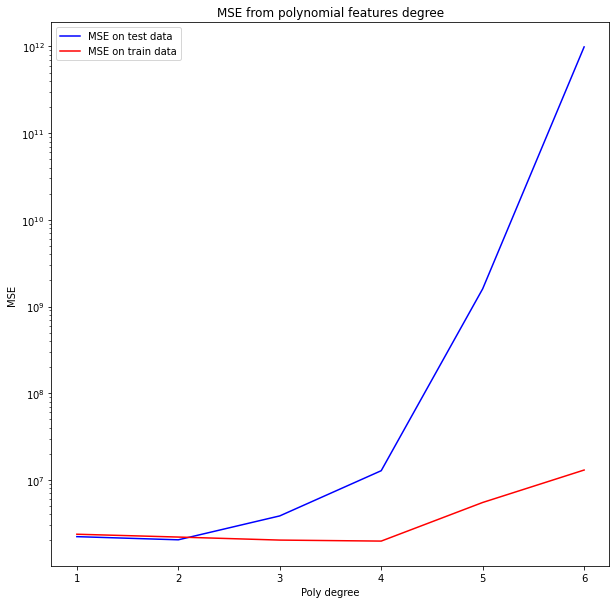

In [22]:
# ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
er_trains = []
er_tests = []
y_train = train_data[:, 9]
y_train = y_train.astype(np.float64)
for degree in range(1, 7):
    X = np.ones(n).reshape((n,1))
    Xx = np.ones(m).reshape((m,1))
    
    X_train_poly_features = add_polynomial_features(train_data[:, [0, 6, 7, 8]].astype(np.float64).T, degree).T
    X = np.concatenate((X, X_train_poly_features), axis=1)

    X_test_poly_features = add_polynomial_features(test_data[:, [0, 6, 7, 8]].astype(np.float64).T, degree).T
    Xx = np.concatenate((Xx, X_test_poly_features), axis=1)
    a = np.dot(np.dot(sla.inv(np.dot(X.T, X)), X.T), y_train.reshape((n,1)))
    er_train = np.mean((np.dot(X, a) - y_train.astype(np.float64).reshape((n,1)))**2)
    er_test = np.mean((np.dot(Xx, a) - y_test.astype(np.float64).reshape((m,1)))**2)
    er_trains.append(er_train)
    er_tests.append(er_test)
plt.figure(figsize=(10, 10))    
print(er_tests)
print(er_trains)
plt.semilogy(range(1, 7), er_tests, color='blue', label='MSE on test data')
plt.semilogy(range(1, 7), er_trains, color='red', label='MSE on train data')
plt.ylabel('MSE')
plt.xlabel('Poly degree')
plt.title('MSE from polynomial features degree')
plt.legend()
plt.show()
# Чем больше мы делаем степень, тем больше у нас ошибка на тестовой выборке.
# В принципе ожидал такого, по причине переобученности.
# Но немного неожиданно, что ошибка и на тренировочных данных возрастает, при увеличении степени от 4 до 6.

Наблюдаемый вами эффект называется переобучением: ситуация, когда модель становится слишком зависимой от обучающей выборки. Действительно, в процессе обучения модели мы стараемся минимизировать ошибку именно на обучающей выборке, и совершенно неочевидно, почему обученная модель будет обобщаться на объекты, которых она раньше не видела.

Когда мы начали добавлять в выборку полиномиальные признаки большой степени, модель стала настолько сложной, что обрела способность запомнить обучающую выборку вместо того, чтобы извлекать из неё какие-то закономерности. Как следствие, когда мы подали модели на вход выборку, отличную от обучающей, мы получили колоссальную ошибку.

Ситуация, когда качество модели на обучающей выборке гораздо ниже качества на тестовой выборке, является самым явным симптомом переобучения, но не единственным. Часто в ситуации переобучения можно наблюдать необычайно большие по модулю коэффициенты модели.

Есть много способов борьбы с этим злом. Один из них --- регуляризация. Сейчас мы рассмотрим одну из её разновидностей --- **L2-регуляризацию**. Идея в том, чтобы подправить матрицу $X^TX$, сделав её "получше". Например, это можно сделать, заменив её на $(X^TX + \lambda E)$, где $\lambda > 0$ --- некоторый скаляр. Пожертвовав точностью на обучающей выборке, мы тем не менее получаем численно более стабильное псевдорешение $a = (X^TX + \lambda E)^{-1}X^Ty$ и снижаем эффект переобучения. *Гиперпараметр* $\lambda$ нужно подбирать, и каких-то универсальных способов это делать нет, но зачастую можно его подобрать таким, чтобы ошибка на тестовой выборке падала.

Однако есть некоторые правила, которых стоит придерживаться при подборе коэффициента регуляризации. Обычно в такой ситуации всю выборку делят на три части: обучающую, *валидационную* и тестовую. Сначала по валидационной подбирают значение гиперпараметра, потом по обучающей строят модель, а по тестовой оценивают её итоговое качество. Кроме того, подбирать $\lambda$ нужно по логарифметической сетке, чтобы узнать оптимальный порядок величины.

**3. [0,1 балла]** Подумайте, почему не стоит подбирать коэффициент регуляризации по обучающей выборке? По тестовой выборке?

Ваше обоснование здесь: ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ На обучающей выборке бесполезно обучать, так как тогда по-факту мы ничего не регулируем.
На тестовой бесмысленно, так как мы вообще не хотим что-то тренировать на тестовой выборке.

**4. [0,3 балла]** Рассмотрим линейную можель с полиномиальными признаками степени $4$ от признаков (carat, x, y, z). Качество такой модели на обучающей выборке уже заметно лучше, чем качество на тестовой. Попробуем исправить эту ситуацию, применив $L2$-регуляризацию. Поделите вашу обучающую выборку на две части в соотношении $8:2$. Большую часть вы вновь объявите обучающей выборкой, а меньшую --- валидационной. Подберите гиперпараметр $\lambda$ по логарифмической сетке таким образом, чтобы линейная модель с "подправленной" матрицей Грама $X^TX$ выдавала лучшее качество на валидационной выборке. Обучите линейную модель с подобранным параметром $\lambda$ на обучающей выборке и протестируйте её на тестовых данных. Сделайте вывод: помогла ли нам регуляризация?

*Примечание: np.logspace вам в помощь.*

In [23]:
# ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

train_data, validation_data = train_test_split(was_train_data, test_size=0.2, random_state=42)

y_train = train_data[:, 9]
y_train = y_train.astype(np.float64)
y_validation = validation_data[:, 9]
y_validation = y_validation.astype(np.float64)
y_test = test_data[:, 9]
y_test = y_test.astype(np.float64)
n = len(train_data)
X = np.ones(n).reshape((n,1))
k = len(validation_data)
Xx_validation = np.ones(k).reshape((k,1))
m = len(test_data)
Xx = np.ones(m).reshape((m,1))

degree = 4

X_train_poly_features = add_polynomial_features(train_data[:, [0, 6, 7, 8]].astype(np.float64).T, degree).T
X = np.concatenate((X, X_train_poly_features), axis=1)

X_validation_poly_features = add_polynomial_features(validation_data[:, [0, 6, 7, 8]].astype(np.float64).T, degree).T
Xx_validation = np.concatenate((Xx_validation, X_validation_poly_features), axis=1)

X_test_poly_features = add_polynomial_features(test_data[:, [0, 6, 7, 8]].astype(np.float64).T, degree).T
Xx = np.concatenate((Xx, X_test_poly_features), axis=1)

best_lambd = -123123123
current_best = 100000000000

what = np.logspace(-30, 30, num=1000)

for i in range(0, len(what)):
    lambd = what[i]
    me = np.dot(Xx_validation.T, Xx_validation)
    me = me + lambd * np.eye(len(me))
    b = np.dot(np.dot(sla.inv(me), Xx_validation.T), y_validation.reshape((k,1)))
    er = np.mean((np.dot(Xx_validation, b) - y_validation.astype(np.float64).reshape((k,1)))**2)
    if current_best > er:
        current_best = er
        best_lambd = lambd
#print(best_lambd)
me = np.dot(X.T, X)
me = me + best_lambd * np.eye(len(me))
a = np.dot(np.dot(sla.inv(me), X.T), y_train.reshape((n,1)))
# was    46363715.32701892
# become 26180105.406901218
print("error on test_data = ", np.mean((np.dot(Xx, a) - y_test.astype(np.float64).reshape((m,1)))**2))
# Сильно лучше стало :)

error on test_data =  26180105.406901218


**5. [0,5 балла]** Повторите первое задание, но вместо 6 обычных линейных моделей обучите 6 регуляризованных линейных моделей. Для каждой модели вам нужно будет подобрать свой гиперпараметр $\lambda$. Сравните полученный график с графиком из первого задания: для всякой ли степени мы смогли улучшить ситуацию? Как выдумаете, почему?

[2217446.4725865093, 2009815.7417090088, 6142445.48813991, 107516871.41342954, 4927989119.667093, 4377791853.127584]
[2404598.4509947686, 2081209.3135993264, 1944740.835978888, 1967133.22670576, 4341618.73005125, 6987261.41637735]


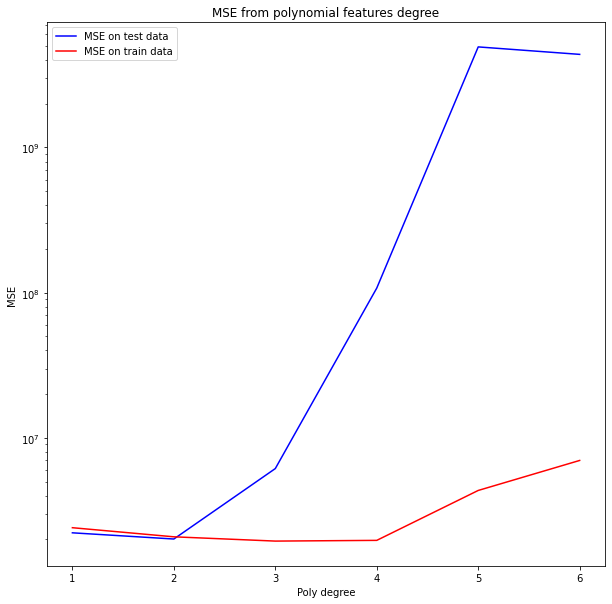

In [24]:
# ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

train_data, validation_data = train_test_split(was_train_data, test_size=0.2, random_state=42)


er_trains = []
er_tests = []
y_train = train_data[:, 9]
y_train = y_train.astype(np.float64)
y_validation = validation_data[:, 9]
y_validation = y_validation.astype(np.float64)
y_test = test_data[:, 9]
y_test = y_test.astype(np.float64)
n = len(train_data)
X = np.ones(n).reshape((n,1))
k = len(validation_data)
Xx_validation = np.ones(k).reshape((k,1))
m = len(test_data)
Xx = np.ones(m).reshape((m,1))

for degree in range(1, 7):
    X_train_poly_features = add_polynomial_features(train_data[:, [0, 6, 7, 8]].astype(np.float64).T, degree).T
    X = np.concatenate((X, X_train_poly_features), axis=1)

    X_validation_poly_features = add_polynomial_features(validation_data[:, [0, 6, 7, 8]].astype(np.float64).T, degree).T
    Xx_validation = np.concatenate((Xx_validation, X_validation_poly_features), axis=1)

    X_test_poly_features = add_polynomial_features(test_data[:, [0, 6, 7, 8]].astype(np.float64).T, degree).T
    Xx = np.concatenate((Xx, X_test_poly_features), axis=1)

    best_lambd = -123123123
    current_best = 100000000000

    what = np.logspace(-30, 30, num=1000)

    for i in range(0, len(what)):
        lambd = what[i]
        me = np.dot(Xx_validation.T, Xx_validation)
        me = me + lambd * np.eye(len(me))
        b = np.dot(np.dot(sla.inv(me), Xx_validation.T), y_validation.reshape((k,1)))
        er = np.mean((np.dot(Xx_validation, b) - y_validation.astype(np.float64).reshape((k,1)))**2)
        if current_best > er:
            current_best = er
            best_lambd = lambd
    me = np.dot(X.T, X)
    me = me + best_lambd * np.eye(len(me))
    a = np.dot(np.dot(sla.inv(me), X.T), y_train.reshape((n,1)))
    er_train = np.mean((np.dot(X, a) - y_train.astype(np.float64).reshape((n,1)))**2)
    er_test = np.mean((np.dot(Xx, a) - y_test.astype(np.float64).reshape((m,1)))**2)
    er_trains.append(er_train)
    er_tests.append(er_test)
plt.figure(figsize=(10, 10))    
print(er_tests)
print(er_trains)
plt.semilogy(range(1, 7), er_tests, color='blue', label='MSE on test data')
plt.semilogy(range(1, 7), er_trains, color='red', label='MSE on train data')
plt.ylabel('MSE')
plt.xlabel('Poly degree')
plt.title('MSE from polynomial features degree')
plt.legend()
plt.show()    
# WAS
# [2213951.3897859994, 2035211.4309376727, 3840481.2825281136, 12758961.63618383,  1598404290.7286124, 987656184606.1017]
# [2360461.8261069423, 2189631.2122314074, 2020452.0259824034, 1967173.6316537822, 5486241.396041411,  12991294.014389869]
# BECOME
# [2217446.4725865093, 2009815.7417090088, 6142445.48813991,   107516871.41342954, 4927989119.667093,  4377791853.127584]
# [2404598.4509947686, 2081209.3135993264, 1944740.835978888,  1967133.22670576,   4341618.73005125,   6987261.41637735]
# На тестовой выборке мы улучшили ситуацию для степеней 2, 6.
# На обучающей выборке мы улучшили ситуацию для степеней 2, 3, 5, 6.
# Каежется это просто плохая идея, пытаться приближать такой большой степенью, поэтому даже такая регуляризация не спасает.
# Но для обучающей выборки это действительно сильно лучше делает.

**6. [1,15 балла]** Пусть заданы $X\in \text{Mat}_{n \times k}(\mathbb{R})$, $\lambda \geqslant 0$, а также известно, что $\text{rk}~X = k \leqslant n$. Решите следующую задачу оптимизации:
$$|Xa - y|^2 + \lambda|a|^2\rightarrow\min\limits_{a \in \mathbb{R}^k}.$$

Заметим, что первое слагаемое --- это значение mean-square error (с точностью до домножения на некоторую константу) модели с коэффициентами $a = (a_1, \ldots, a_k)$. Типичной задачей линейной регрессии является минимизация первого слагаемого по всем векторам $a$. Однако в данном случае кроме минимизации среднеквадратичной ошибки мы также добавляем условие, что при этом и веса модели должны быть как можно меньше. Действительно, мы уже убедились, что чем сложнее модель, тем меньше будет ошибка на обучающей выборке (а именно это ошибку мы и минимизируем в процессе обучения) и тем вероятнее модель будет иметь большие по модулю коэффициенты, а значит, и большое значение $|a|$. Добавляя второе слагаемое в рассматриваемый выше функционал, мы как бы задаём ограничение на абсолютную величину коэффициентов модели. При этом параметр $\lambda$ явно будет указывать, насколько сильно мы будем штрафовать модель за большие коэффициенты. Заметим, что если $\lambda = 0$, то мы получаем классическую задачу линейной регресии без регуляризации.

Ваше решение здесь: ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

**7. [0,25 балла]** При построении линейной модели у вас, как правило, есть также и свободный член, не зависящий от признаков из выборки. Подумайте, почему регуляризовать свободный член — плохая идея?

Ваше обоснование здесь: ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ Мы регуляризируем, чтобы наша модель была более чувствительна к изменениям входных данных (то есть чтобы при изменении входных данных, она лучше подстравивалсь под них, мы как-бы минимизурем кривизну). Так как свободный член не влияет на кривизну, то и его регуляризация смысла большого не имеет.

**8. [0,5 балла]** Пусть теперь $\text{rk}~X < k$. Всегда ли в этом случае существует решение? Если существует, то является ли оно единственным? Ответ обоснуйте.

Ваше обоснование здесь: ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

**9. [0,4 балла]** Покажите, что если решений бесконечно много, то среди них обязательно найдутся решения со сколь угодно большими по модулю компонентами вектора $a$.

Ваше обоснование здесь: ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ Понятно, что решения будут образовывать подпространство, а в нем есть вектора со сколь угодно большими по модулю коэффициентами.

### Добавление. QR-разложение

**QR-разложением** матрицы $A$ (не обязательно квадратной) мы будем называть её представление в виде $A = QR$, где $Q$ — матрица с ортонормированными столбцами, а $R$ - верхнетреугольная матрица.

Смысл QR-разложения следующий. Пусть $a_1,\ldots,a_m$ — столбцы матрицы $A$, $q_1,\ldots,q_t$ — столбцы матрицы $Q$. Тогда $q_1,\ldots,q_t$ — это ортонормированный базис в подпространстве, являющемся линейной оболочкой векторов $a_1,\ldots,a_m$, а в матрице $R$ записаны коэффициенты, с помощью которых $a_i$ выражаются через $q_1,\ldots,q_t$.

Находить QR-разложение заданной матрицы можно разными способами. Мы познакомим Вас не с самым лучшим из них, но по крайней мере с наиболее простым концептуально. Заметим, что ортогональный базис линейной оболочки можно найти с помощью ортогонализации Грама-Шмидта. При этом коэффициенты из матрицы $R$ получаются в качестве побочного продукта этого процесса:

```python
for j = 1...n:
    q_j = a_j
    for i = 1,...,j-1:
        r_ij = (q_i, a_j)
        q_j = q_j - r_ij * q_i
    r_jj = |q_j|
    if r_jj == 0: # a_j in <a_1,...,a_j-1>
        # What would you do in this case?..
    q_j = q_j / r_jj
```

Для нахождения QR-разложения Вы можете использовать библиотечную функцию `scipy.linalg.qr`.

Поскольку лабораторная про линейную регрессию, не так-то просто замять вопрос о том, какое же отношение QR-разложение имеет к задаче регрессии. Упомянем одно из возможных применений.

Допустим, мы нашли QR-разложение матрицы $X$, а именно: $X = QR$. Тогда
$$X^TX = (QR)^T(QR) = R^TQ^TQR = R^TR$$

Поскольку в задаче регрессии матрица $X$ обычно полного ранга (то есть её столбцы линейно независимы), матрица $R$ будет квадратной. Благодаря этому нашу обычную формулу для набора регрессионных коэффициентов $\hat{a}$ можно переписать в следующем виде:

$$\hat{a} = (X^TX)^{-1}X^Ty = (R^TR)^{-1}(QR)^Ty = R^{-1}(R^T)^{-1}R^TQ^Ty = R^{-1}Q^Ty$$

Как видите, формула стала проще. Более того, зачастую обращение матрицы $R$ может быть численно более устойчиво, чем обращение матрицы $X^TX$.